Time per board: 20.94571590423584ms
Worst time: 29.348373413085938ms


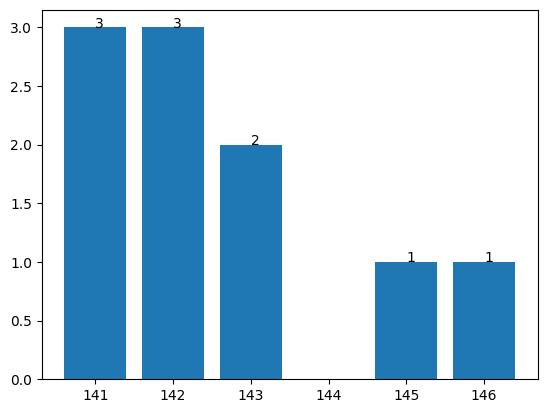

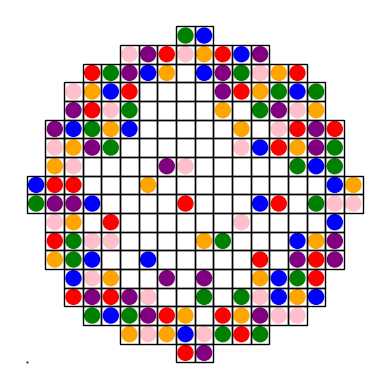

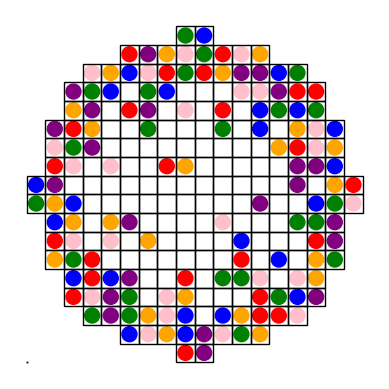

In [7]:
from __future__ import annotations

import collections
import time

from game.convex import grid
from game.players import heuristics
from matplotlib import pyplot as plt


def play(gri : grid.Grid) -> list[int]:
    heuristics.Heuristic.reset_id()

    h = [
        heuristics.Heuristic(gri, 1, 3),
        heuristics.Heuristic(gri, 1, 3),
        heuristics.Heuristic(gri, 1, 3),
        heuristics.Heuristic(gri, 1, 3),
        heuristics.Heuristic(gri, 1, 3),
        heuristics.Heuristic(gri, 1, 3),
    ]

    while all(not heur.busted for heur in h):
        for heur in h:
            heur.play()

        # _ = g.to_image().show()

    return [heur.id for heur in h if heur.busted]

def do(n : int) -> None:
    start = time.time()
    worst_time = 0
    best: grid.Grid = grid.Grid([])
    worst: grid.Grid | None = None
    nb_played = []

    for _ in range(n):
        gr = grid.Grid([
            # small circle
            # (1, 0),(1, 1),(2, 1),(-1, 1),(-2, 1),(0, 1),(1, 2),(-1, 2),

            # square
            # (0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),
            # (1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),

            # big circle
            (1, 0), (1, 1), (2, 1), (-1, 1), (-2, 1), (0, 1),
            (1, 2), (-1, 2), (1, 3), (-1, 3), (3, 1), (-3, 1),
        ])

        t1 = time.time()

        play(gr)

        t2 = time.time()

        if t2 - t1 > worst_time:
            worst_time = t2 - t1

        nb_played.append(len(gr.played))

        if best is None or len(best.played) < len(gr.played):
            best = gr

        if worst is None or len(worst.played) > len(gr.played):
            worst = gr

    stop = time.time()

    print(f"Time per board: {(stop - start) / n * 1000}ms")  # noqa: T201 - using in ipynb
    print(f"Worst time: {worst_time * 1000}ms")  # noqa: T201 - using in ipynb

    col = collections.Counter(nb_played)
    plt.bar(list(col.keys()), list(col.values()))

    for i, v in col.items():
        plt.text(i, v, str(v))

    plt.show()

    _ = best.to_image()  # using _ =  to prevent displaying the image twice

    if worst is not None:
        _ = worst.to_image()  # using _ =  to prevent displaying the image twice

do(int(1e1))

Time per board: 49.99109745025635ms
Worst time: 1659.8331928253174ms


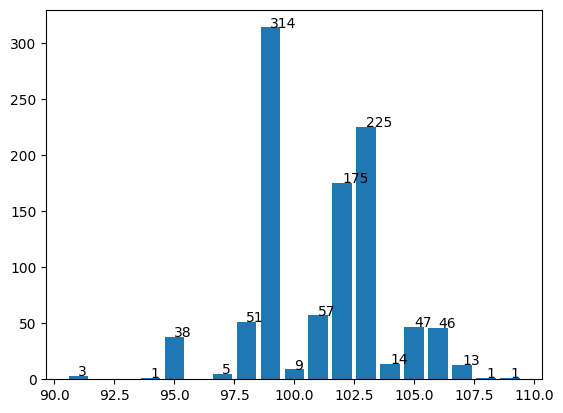

         339724564 function calls (339709134 primitive calls) in 49.294 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   49.294   49.294 {built-in method builtins.exec}
        1    0.000    0.000   49.294   49.294 <string>:1(<module>)
        1    0.011    0.011   49.294   49.294 2812950403.py:29(do)
     1000    0.062    0.000   48.044    0.048 2812950403.py:11(play)
   102668    0.299    0.000   47.889    0.000 player.py:75(play)
   102668    0.046    0.000   39.559    0.000 heuristics.py:151(_choose)
   102668    4.753    0.000   39.513    0.000 heuristics.py:33(_choice_one)
 11228293    5.863    0.000   33.340    0.000 {built-in method builtins.sum}
101928962   20.790    0.000   27.475    0.000 heuristics.py:45(<genexpr>)
   102668    1.368    0.000    7.915    0.000 player.py:53(_add_new_pos)
181409163    6.686    0.000    6.686    0.000 {built-in method builtins.abs}
  2409512    0.418 

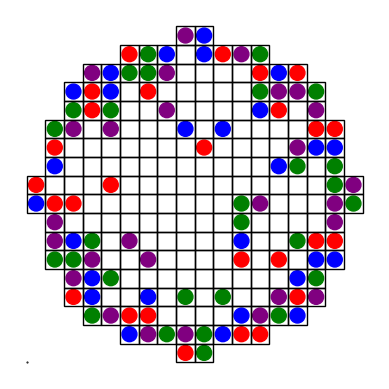

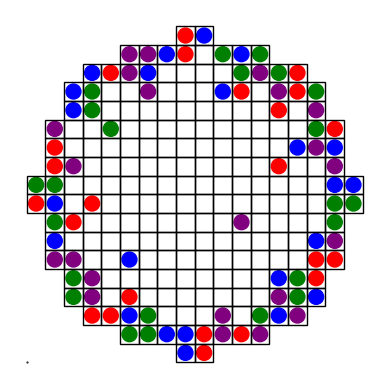

In [6]:
import cProfile

cProfile.run("do(int(1e3))", sort="cumtime")